# Extended Numerical Mathematical Methods

## Contents

##### i) Dirac Delta Function

##### ii) Improper Integrals

### Dirac Delta Function

In [1]:
from math import*
import matplotlib.pyplot as plt

In [2]:
def delta0(pr,x):
    x0,al=pr
    return exp(-(x-x0)**2/al**2)/(pi**0.5*al)
def delta1(pr,x):
    x0,al=pr
    return al/(pi*((x-x0)**2+al**2))
def delta2(pr,x):
    x0,al=pr
    return sin((x-x0)/al)/(pi*(x-x0))
def delta3(pr,x):
    x0,al=pr
    return 1/(2*al*(cosh((x-x0)/al))**2)


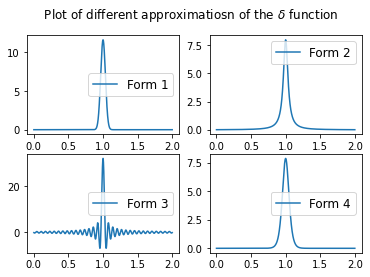

In [3]:
x0=1
a,b=x0-1,x0+1
dx=1e-3
N=int((b-a)/dx)
dx=(b-a)/(N-1)
x=[a+dx*i for i in range(N)]

plt.suptitle(r" Plot of different approximatiosn of the $\delta$ function")

plt.subplot(221)
al=4.85e-2
fx=[delta0([x0,al],xx) for xx in x]
plt.plot(x,fx,label='Form 1')
plt.legend(loc='best',prop={'size':12})

plt.subplot(222)
al=4e-2
fx=[delta1([x0,al],xx) for xx in x]
plt.plot(x,fx,label='Form 2')
plt.legend(loc='best',prop={'size':12})

plt.subplot(223)
al=1e-2
fx=[delta2([x0,al],xx) for xx in x]
plt.plot(x,fx,label='Form 3')
plt.legend(loc='best',prop={'size':12})

plt.subplot(224)
al=6.35e-2
fx=[delta3([x0,al],xx) for xx in x]
plt.plot(x,fx,label='Form 4')
plt.legend(loc='best',prop={'size':12})

plt.show()

In [4]:
from Gauss_Legendre import*
from math import*

In [5]:
x0=1.3
a,b=x0-8,x0+8
alphs=[4.85e-2,4.0e-2,1e-2,6.35e-2]
def f(x):
    return exp(-(x-2)**2/2)
def f_del(pr,x):
    delta2,x0,al=pr
    return delta2([x0,al],x)*f(x)
print('f(x0) = ',f(x0))
print('Integral for different forms of Delta function')
for al in alphs:
    print ("Integral of f(x) delta(x-x0) : ",GaussLegdQuad(f_del,[delta2,x0,al],700,a,b))
           

f(x0) =  0.7827045382418681
Integral for different forms of Delta function
Integral of f(x) delta(x-x0) :  0.7827045382418659
Integral of f(x) delta(x-x0) :  0.7827045382418666
Integral of f(x) delta(x-x0) :  0.7827045382418756
Integral of f(x) delta(x-x0) :  0.7827045382418613


In [6]:
x0=1
a,b=x0-1,x0+1
alphs=[4.85e-2,4e-2,1e-2,6.36e-2]
deltas=[delta0,delta1,delta2,delta3]
for i in range(len(deltas)):
     print ("Integral of f(x) delta(x-x0) : ",GaussLegdQuad(deltas[i],[x0,alphs[i]],700,a,b))
    

Integral of f(x) delta(x-x0) :  0.999999999999568
Integral of f(x) delta(x-x0) :  0.9745445387307851
Integral of f(x) delta(x-x0) :  0.9946023169230056
Integral of f(x) delta(x-x0) :  0.9999999999962137


### Improper Integrals

In [7]:
def trpzMidPOntIntg(f,pr,aa,bb,tol):
    nmx=20
    a=0
    b=0
    if aa == 'infty':
        a=pi/2
    elif aa=='-infty':
        a=-pi/2
    else:
        a=atan(aa)
    if bb == 'infty':
        b=pi/2
    elif bb =='-infty':
        b=-pi/2
    else:
        b=atan(bb)
    def fn(pr,x):
        return f(pr,tan(x))/(cos(x))**2
    I1=0
    for n in range(nmx):
        N=3**n
        h=(b-a)/N
        s=0
        for i in range(N):
            s=s+fn(pr,a+(2*i+1)*(h/2))
        I2=h*s
        if abs(I1-I2)<tol:
            break
        else:
            I1=I2
    if n<nmx:
        return I2
    else:
        return None

In [8]:
def f(pr,x):
    a,b,c=pr
    return exp(-a*x**2+b*x+c)
a,b,c=1,1,1
tol=1e-5
print((pi/a)**0.5*exp((b**2/(4*a))+c))

trpzMidPOntIntg(f,[a,b,c],'-infty','infty',tol)

6.186471815934188


6.186471815934188

In [9]:
def f(pr,x):
    b=pr
    return x**2*exp(-b*x**2)
tol=1e-4
b=1.5
T=trpzMidPOntIntg(f,b,0,'infty',tol)
print('The value of the Integral is : ',(4*b**1.5*T)/pi**0.5)

The value of the Integral is :  1.0000000000000002


$\int_{0}^{\infty} \frac{dx}{1+x^{2}}~=~\frac{\pi}{2}$

In [10]:
#def f(pr,x):
 #   return (1+x**2)
#tol=1e-4
#T=trpzMidPOntIntg(f,None,0,'infty',tol)
#print("The value of the integral is : ",T)

In [11]:
def simpMidPntIntg(f,pr,aa,bb,tol):
    nmx=20
    a=0
    b=0
    if aa == 'infty':
        a=pi/2
    elif aa=='-infty':
        a=-pi/2
    else:
        a=atan(aa)
    if bb == 'infty':
        b=pi/2
    elif bb =='-infty':
        b=-pi/2
    else:
        b=atan(bb)
    def fn(pr,x):
        return f(pr,tan(x))/(cos(x))**2
    I1=0
    ol=0
    for n in range(nmx):
        N=3**n
        h=(b-a)/N
        s=0
        for i in range(N):
            s=s+fn(pr,a+(2*i+1)*(h/2))
        I=h*s
        I2=(9*I-ol)/8
        if abs(I1-I2)<tol:
            break
        else:
            I1=I2
            ol=I
    if n<nmx:
        return I2
    else:
        return None

In [18]:
#def f1(pr,x):
#   return log(sin(x))
#def f2(pr,x):
 #   return 1/(x-x**2)**0.5
#def f3(pr,x):
#    return 1/(1+x)**3
#def f4(pr,x):
#    return 1/(x**2+x-2)
#def f5(pr,x):
#    a,b=pr
#    return exp(-a*x)*cos(bx)
#def f6(p,x):
#    return 1/x**p
#def f7(p,x):
#    return 1/x**p
#def f8(pr,x):
#    a,b=pr
#   return sin(a*x)*exp(-b*x)
#lims=[[0,pi/2],[0.5,1],[0,'infty'],[3,'infty'],[0,'infty'],[2,'infty'],[0,2],[0,'infty']]
#par=[None,None,None,None,[1,2],3,0.4,[1,1]]
#exact=[-pi/2*log(2),pi/2,0.5,(1/3)*log(5/2),0.2,2,-0.125,0.5]
#f=[f1,f2,f3,f4,f5,f6,f7,f8]
#print("calculated ","Exact")
#for i in range(8):
#    I=simpMidPntIntg(f[i],par[i],lims[i][0],lims[i][1],1e-4)
#    print(I,"      ",exact[i]) 
    

In [20]:
from bisec import*

In [22]:
from brckSols import*

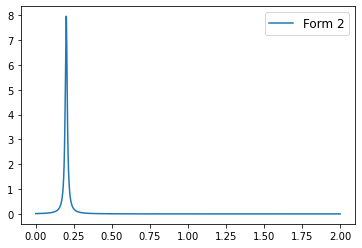

In [44]:
x0=1
a,b=x0-1,x0+1
dx=1e-3
N=int((b-a)/dx)
dx=(b-a)/(N-1)
x=[a+dx*i for i in range(N)]


aa=5

al=4e-2

fx=[delta1([x0,al],aa*xx) for xx in x]
plt.plot(x,fx,label='Form 2')
plt.legend(loc='best',prop={'size':12})




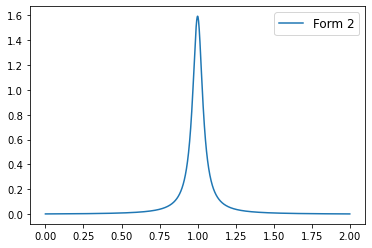

In [45]:
fx=[delta1([x0,al],xx)/abs(aa) for xx in x]
plt.plot(x,fx,label='Form 2')
plt.legend(loc='best',prop={'size':12})



plt.show()